<h1 align ='center'>Calculating Galaxy Distance Using Spectra </h1>

#### Authors

##### Md. Bayozid Hossen
- **Position**: Student, Department of Physics  
- **Institution**: Jagannath University
- **E-mail**: [b210303012@phy.jnu.ac.bd](mailto:b210303012@phy.jnu.ac.bd)

##### K M Shariat Ullah
- **Position**: Student, Electrical & Electronic Engineering  
- **Institution**: Shahjalal University of Science & Technology  
- **E-mail**: [cast.shariat@gmail.com](mailto:cast.shariat@gmail.com)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks 

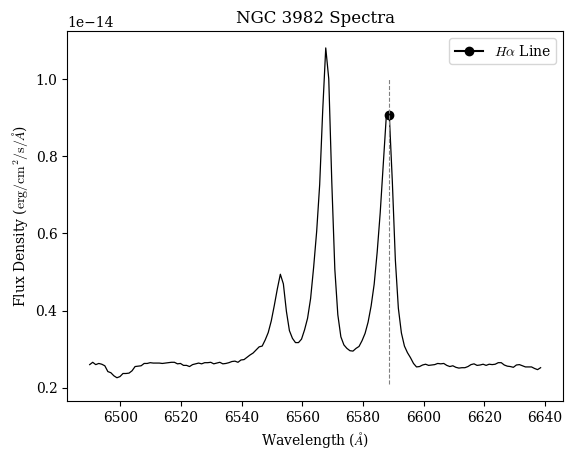

In [18]:
# load dataset
data = pd.read_csv("NGC_3982.csv")
wave = data.wavelength[300:450]
intensity = data.intensity[300:450]

# Set the font to Computer Modern using Matplotlib's built-in support
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'

plt.plot(wave, intensity, color='#000', linewidth='0.9')
plt.title('NGC 3982 Spectra')
plt.xlabel('Wavelength ($\\AA$)')
plt.ylabel('Flux Density ($\\text{erg/cm}^2\\text{/s/}\\AA$)')

# Add a cross marker at index 399
plt.plot(wave[399], intensity[399], marker='o', color='#000', markersize=6, label='$H \\alpha$ Line')
plt.vlines(wave[399], ymin=0.21e-14, ymax=1e-14, linestyles='dashed', linewidth=0.8, color='gray')
plt.legend()

plt.show()

In [4]:
# finding the red shifted wavelength of the H beta line
peak = find_peaks(intensity, height =0.8e-14)
print(f"Red Shifted H alpha Line at: {wave[300+peak[0][1]]} Angstorm with Intensity {intensity[300+peak[0][1]]}")

Red Shifted H alpha Line at: 6588.66 Angstorm with Intensity 9.07e-15


In [5]:
wave_obs = 6588.66         # angstorm
wave_src = 6562.8          # angstorm

z = (wave_obs - wave_src)/wave_src
print(f"Value of Redshift is : {z:0.6f}")

c = 299792458
v = c * z / 1000            # km/s
H = 72                      # km/s/Mpc
d_act = 18.91               # Mpc
 
print(f"The velocity of NGC 3982: {v:0.2f} km/s")

d_spectra = v / H

print(f"The distance of the NGC 3982 is : {d_spectra:0.2f} km/Mpc")

error = (d_act - d_spectra)/d_act * 100
print(f"Error is: {error:0.2f}%")


Value of Redshift is : 0.003940
The velocity of NGC 3982: 1181.30 km/s
The distance of the NGC 3982 is : 16.41 km/Mpc
Error is: 13.24%


<h1 align ='center'>Calculating Galaxy Distance Using Density Parameter </h1>
<h5 align = 'center'> 
    Author: K M Shariat Ullah  <br>
    Student, Electrical and Electronic Engineering, <br>
    Shahjalal University of Science and Technology <br>
    E-mail: cast.shariat@gmail.com
</h5>


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.integrate import quad

In [7]:
# ---------------------
#      Constants
# ---------------------
c = 299792458                # m/s                     
H_0 = 72                     # km/s/Mpc
lambda_src = 6562.8          # Rest wavelength of H alpha line
lambda_obs = 6588.66         # Observed wavelength of H alpha line

# Updated matter density parameter (Planck 2018) 
omega_m = 0.3142  
omega_lambda = 0.6858 
omega_k = 0.001 

# Literature distance of NGC 3982
d_act = 18.91                                        
D_H = c / H_0


In [8]:
# red shift
z = (lambda_obs - lambda_src) / lambda_src
print(f"Redshift Value of NGC 3982: {z:.6f}")

                                
# Function E(z) from cosmology resource
def E(z):
    return np.sqrt(omega_m * (1 + z)**3 + omega_k * (1 + z)**2 + omega_lambda)

# Calculate comoving distance D_C
def comoving_distance(z):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime), 0, z)
    return D_H * integral

# Compute the comoving distance for NGC 3982
D_C = comoving_distance(z) / 1000
print(f"Comoving Distance of NGC 3982: {D_C:.2f} Mpc")

# error 
error_advanced = abs(D_C - d_act) / d_act * 100
print(f"Error is: {error_advanced:0.2f}%")


# two more distance

D_M = D_C                     # for Omega_k = 0
D_A = D_M / (1+z)
D_L = D_A * (1+z)**2

print(f"Angular Distance: {D_A:0.2f}")
print(f"Luminosity Distance: {D_L:0.2f}")

# error 
error_advanced = abs(D_A - d_act) / d_act * 100
print(f"Error (D_A): {error_advanced:0.2f}%")

# error 
error_advanced = abs(D_L - d_act) / d_act * 100
print(f"Error (D_A): {error_advanced:0.2f}%")

Redshift Value of NGC 3982: 0.003940
Comoving Distance of NGC 3982: 16.38 Mpc
Error is: 13.36%
Angular Distance: 16.32
Luminosity Distance: 16.45
Error (D_A): 13.70%
Error (D_A): 13.02%
